#Van Gestel's Simulation Model (conversion from OHT to POAG) in Python Simpy for Presentation / Tight IOP target
Here is the main Program for the simulation model.

It is OO so most of operations are done outside of this file. 

Number of Iterations: 2

Subjects (patients) per iteration: 3000

QALY is calculated based on VFQ score (VFQ-25 questionaire)

In [1]:
#error checking measures 
import csv 
import matplotlib.pyplot as plt
numberofGraphs = 15
def csv_dict_writer(path, fieldnames, data):
    with open(path, "wb") as out_file:
        writer = csv.DictWriter(out_file, delimiter=',', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)
masterListforReplications = []
field_names = "QALY,TotalCost".split(",")
from PlottingSystemClass import PlottingSystem
from SimulationSystemClass import SimulationSystem
plottingsystem = PlottingSystem(plt)
order = 1

### The main code is here
It is run for 20 rounds
7 plots are produced for each iteration

CURRENT ITERATION: 0
Average QALY: 10.2665128277
Average Medical Cost: 16936.7302617
Average MD: -9.08374930648
Total number of patients with 0 QALY: 221
 
Patient 0: List of Medication Progression is [0, 1, 1, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8]
Patient 0: List of Final Medication Amount is [5, 3, 1, 0, 0]
Patient 1: List of Medication Progression is [0, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Patient 1: List of Final Medication Amount is [8, 6, 4, 0, 2]
Patient 2: List of Medication Progression is []
Patient 2: List of Final Medication Amount is [0, 0, 0, 0, 0]
Patient 3: List of Medication Progression is [0, 2, 2, 2, 17, 17, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 13, 

C:\Users\Martin Nguyen\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


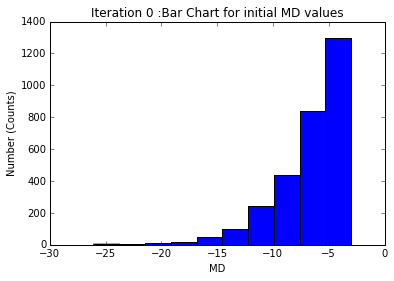

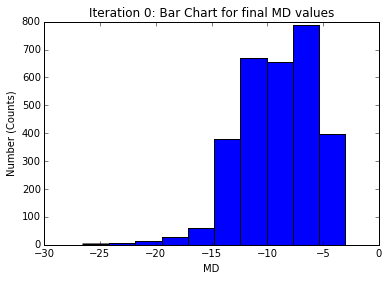

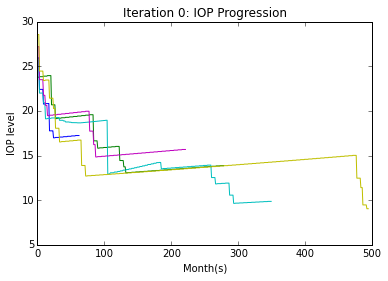

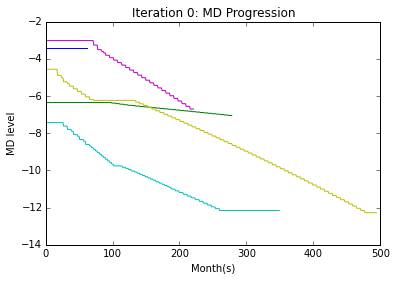

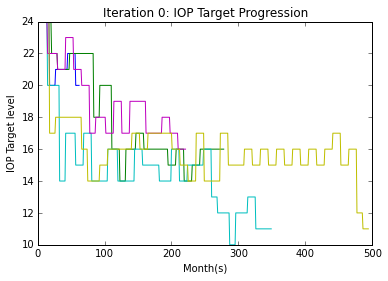

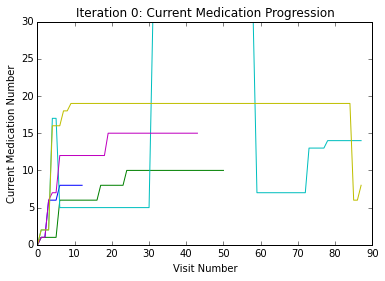

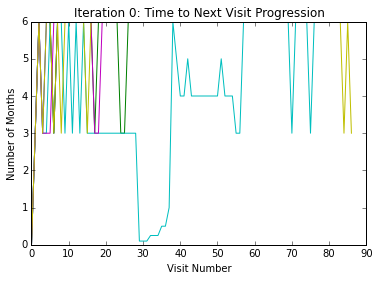

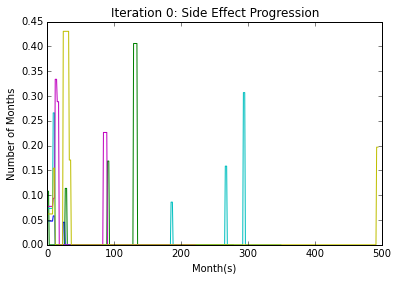

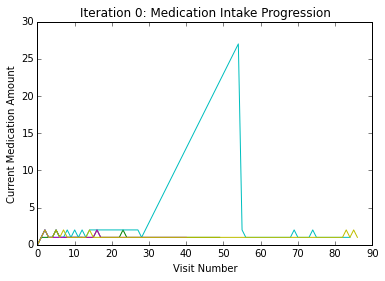

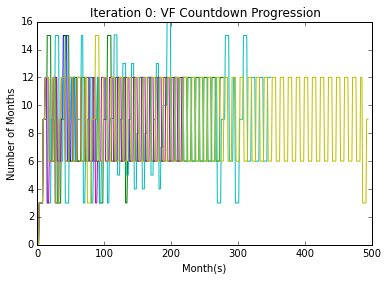

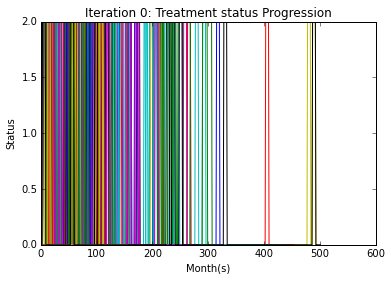

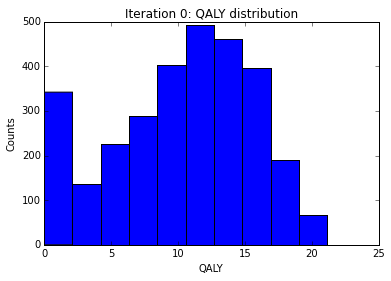

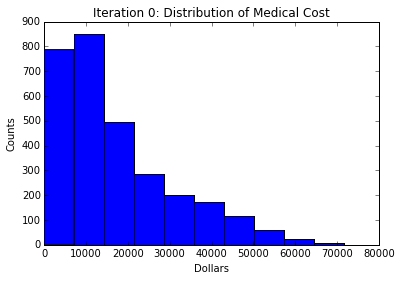

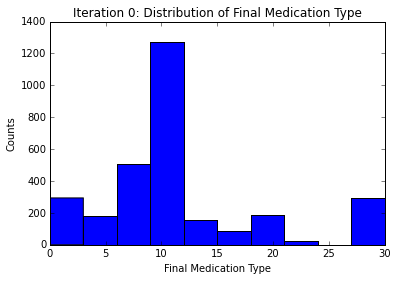

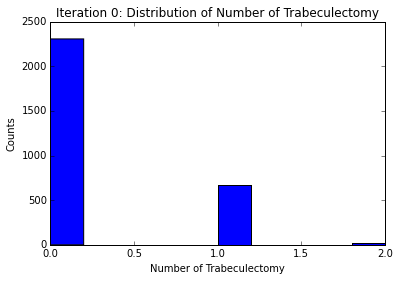

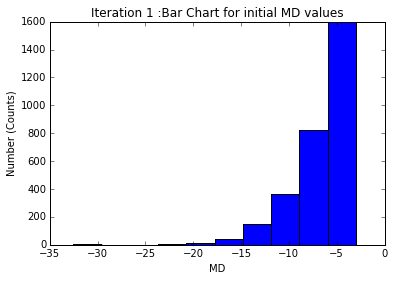

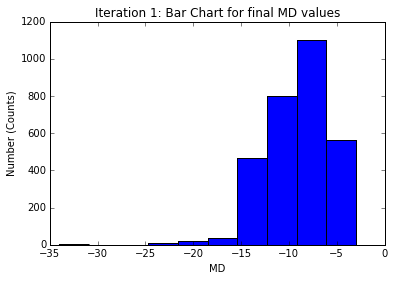

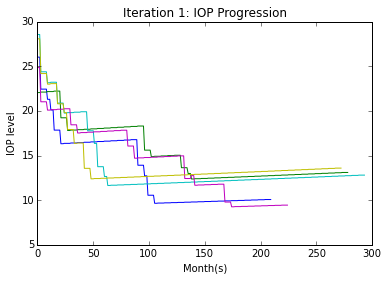

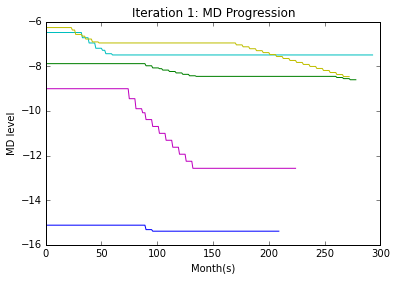

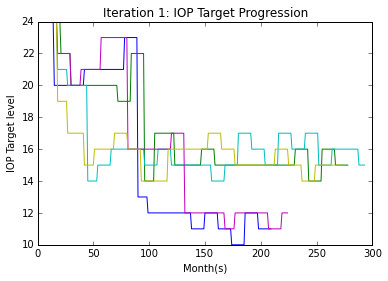

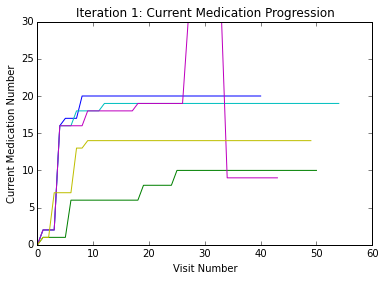

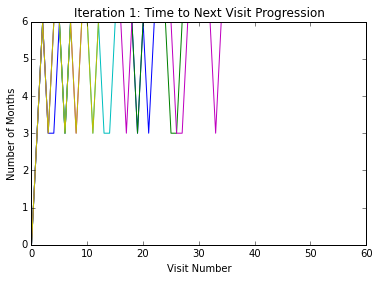

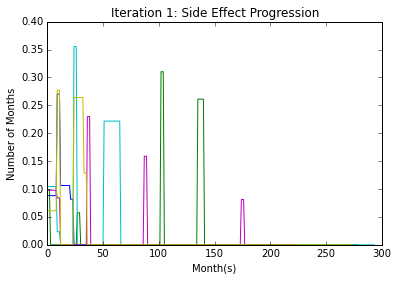

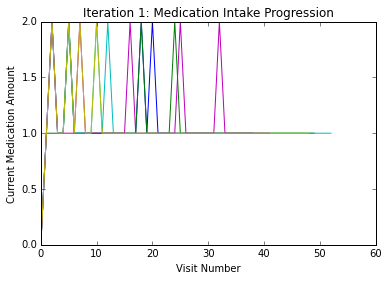

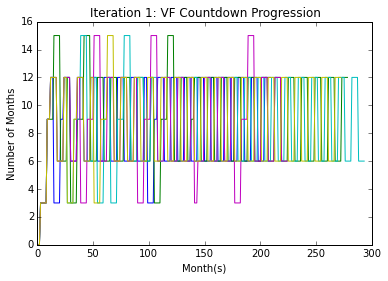

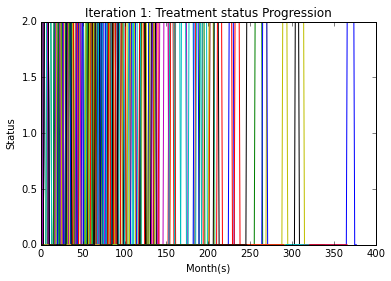

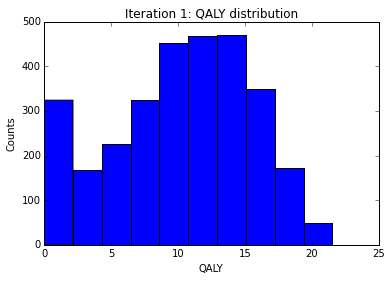

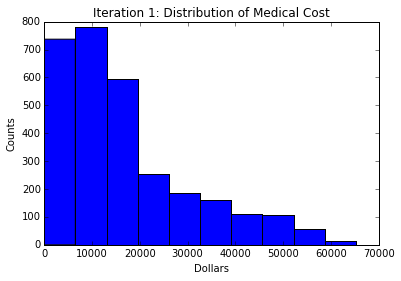

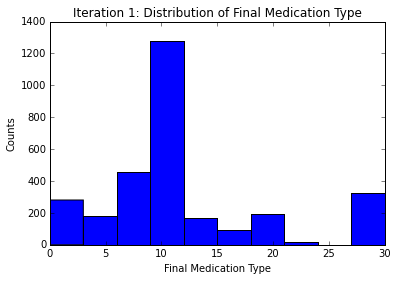

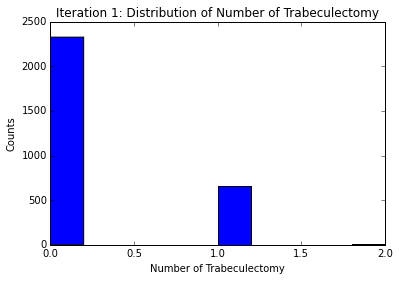

In [3]:
%matplotlib inline
for i in range(2):
    sysSimulation = SimulationSystem(3000,"PatientList/Patients_list_{}.csv".format(i))
    sysSimulation.SystemSimulation()
    plottingsystem.plot(sysSimulation,order,i,masterListforReplications)
    order += (numberofGraphs*1) 
    del sysSimulation 
print order 
csv_dict_writer("MList.csv",field_names,masterListforReplications)

#How Patients are moved within the system 
In order to track what type of medication/treatment patients are currently under, we can use this chart:
<img src = "Images/Iteration0CurrentMed.JPG">
<img src = "Images/Iteration1CurrentMed.JPG">
From 1 to 23 are the medications/combinations of Block 1. 

Number 30 is Trabeculectomy, number 31 is implant

The key map to identify which medication/combination the patients are currently on is this:
<img src = "Images/Capture.JPG">

##A closer look at the medication type movement
###For Iteration 0:
<img src = "Images/Iteration0Movement.JPG">
###For Iteration 1:
<img src = "Images/Iteration1Movement.JPG">

#Other Features of the System
###1. IOP Progression and IOP Target
<img src = "Images/Iteration0CurrentIOPTarget.JPG">
<img src = "Images/Iteration0CurrentIOP.JPG">
New medication/treatment will be indicated once the IOP > IOP Target
###2. When IOP Target will change
This depends on the Progression (MD decrease)
<img src = "Images/Iteration0CurrentMD.JPG">
<img src = "Images/Iteration0CurrentIOPTarget.JPG">

###3. When IOP will increase
<img src = "Images/IncreaseIOP.JPG">

###4. Side Effect Progression
<img src = "Images/Iteration0SideEffect.JPG">
<img src = "Images/Iteration1SideEffect.JPG">
####Side Effect is nullified if:
I. Patients are on Trabeculectomy or Implant

II. Patients' current medication amount is > 10
<img src = "Images/SideEffect10.JPG">

III. IOP < IOP Target
<img src = "Images/NoMedorTrab.JPG">

###5. Effect of IOP on MD
<img src = "Images/Iteration0CurrentIOP.JPG">
<img src = "Images/Iteration0CurrentMD.JPG">
You would notice that there are some flat areas in the MD curves. 

This is because of this behaviour in the system 
<img src = "Images/ParamsIOP.JPG">

This is actually a very peculiar feature of the simulation system because if IOP = [13.15) then MD free falls!

And the system has no way to correct this. The lowest IOP target that warrants change in treatment is 15

###6. Time to Next Visit
<img src = "Images/Iteration0CurrentTimetoVisit.JPG">
<img src = "Images/Iteration1CurrentTimetoVisit.JPG">
###7. VF Countdown
<img src = "Images/Iteration0VF.JPG">
<img src = "Images/Iteration1VF.JPG">
###8. How the VFQ is calculated 
###8. Other Misc things
#### Patients > 85 will not be indicated Surgeries (Trabeculectomy and Implant)
#### Need a baseline for Cataract formation... Not really important for now but we might need it later